In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics

In [2]:
emission = pd.read_csv('CO2 emission.csv')

In [3]:
emission.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB.1,TORQUE,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,8.5,400.0,196
1,2014,ACURA,ILX,COMPACT,2.4,2,M6,Z,11.2,7.7,9.6,9.6,890.0,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,5.9,860.0,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,4.0,6,AS6,Z,12.7,9.1,11.1,11.1,1000.0,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,4,AS6,Z,12.1,8.7,10.6,10.6,1357.0,244


In [4]:
emission_defined = emission[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','TORQUE','CO2EMISSIONS']]

In [5]:
emission_defined.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
0,2.0,4,8.5,400.0,196
1,2.4,2,9.6,890.0,221
2,1.5,4,5.9,860.0,136
3,4.0,6,11.1,1000.0,255
4,3.5,4,10.6,1357.0,244


In [6]:
emission_defined.shape

(1067, 5)

In [7]:
emission_defined.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.349110,5.779756,11.580881,1419.236645,256.228679
std,1.419466,1.797758,3.485595,351.701581,63.372304
min,1.000000,2.000000,4.700000,400.000000,108.000000
25%,2.000000,4.000000,9.000000,1153.500000,207.000000
50%,3.400000,6.000000,10.900000,1395.500000,251.000000
75%,4.300000,8.000000,13.350000,1632.000000,294.000000
max,8.400000,12.000000,25.800000,2699.000000,488.000000


In [8]:
emission_defined.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
TORQUE                  0
CO2EMISSIONS            0
dtype: int64

<Figure size 1152x864 with 0 Axes>

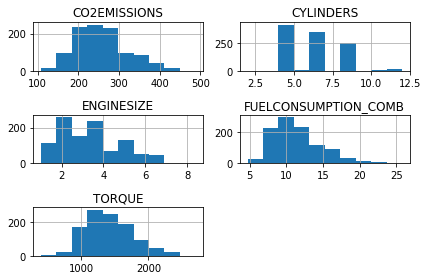

In [9]:
fig = plt.figure(figsize=(16,12))
emission_defined.hist()
plt.tight_layout()
plt.show()

In [11]:
corr

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
ENGINESIZE,1.000000,0.917457,0.816502,0.863699,0.871102
CYLINDERS,0.917457,1.000000,0.764901,0.833958,0.832688
FUELCONSUMPTION_COMB,0.816502,0.764901,1.000000,0.879636,0.892129
TORQUE,0.863699,0.833958,0.879636,1.000000,0.988196
CO2EMISSIONS,0.871102,0.832688,0.892129,0.988196,1.000000


In [10]:
corr = emission_defined.corr()

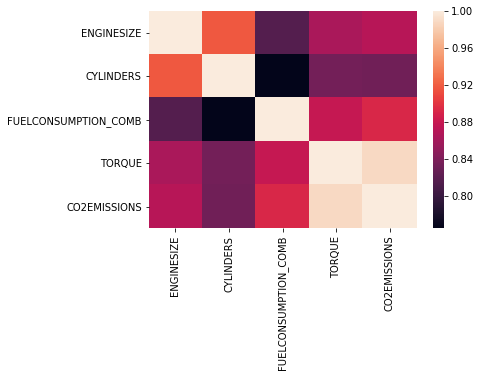

In [8]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

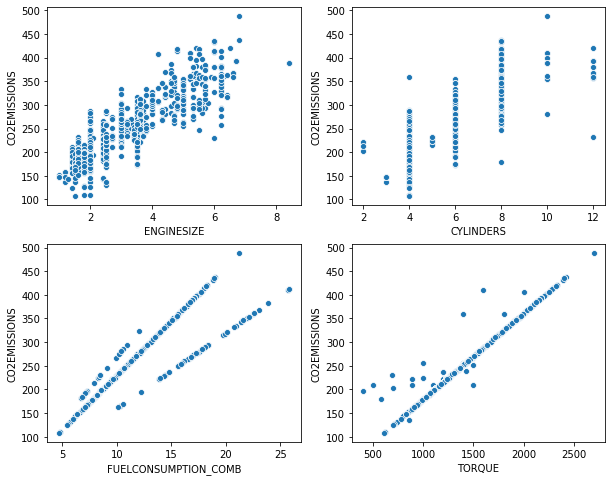

In [12]:
fig = plt.figure(figsize=(10,8))
a1 = fig.add_subplot(221)
a2 = fig.add_subplot(222)
a3 = fig.add_subplot(223)
a4 = fig.add_subplot(224)
sns.scatterplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS',
                data = emission_defined , ax = a1)
sns.scatterplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', 
                data = emission_defined , ax = a2)
sns.scatterplot(x = 'FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS',
                data = emission_defined , ax = a3)
sns.scatterplot(x = 'TORQUE', y = 'CO2EMISSIONS', 
                data = emission_defined , ax = a4)
plt.show()

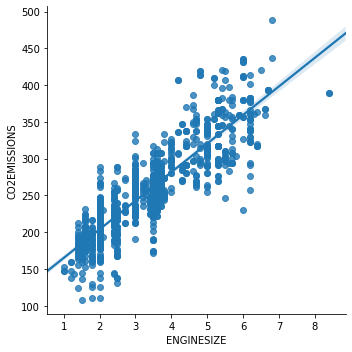

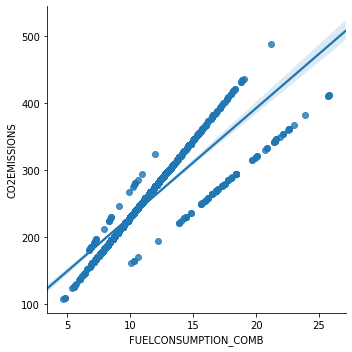

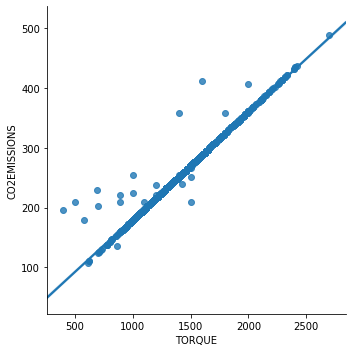

In [13]:
sns.lmplot(x = 'ENGINESIZE' , y = 'CO2EMISSIONS' , data = emission_defined)
sns.lmplot(x = 'FUELCONSUMPTION_COMB' , y = 'CO2EMISSIONS' , data = emission_defined)
sns.lmplot(x = 'TORQUE' , y = 'CO2EMISSIONS' , data = emission_defined)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = emission[['TORQUE']]
y = emission['CO2EMISSIONS']
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,random_state=12)

In [17]:
regre = linear_model.LinearRegression()

# from sklearn import linear_model, metrics

In [18]:
regre.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
regre.score(train_x,train_y)

0.9733557099868166

In [21]:
print("Coefficient or Slope of regression line is: " , regre.coef_[0])
print("Intercept of regression line is: ",regre.intercept_)

Coefficient or Slope of regression line is:  0.17754675682701204
Intercept of regression line is:  4.26852326308196


In [23]:
predict_y = regre.predict(test_x)

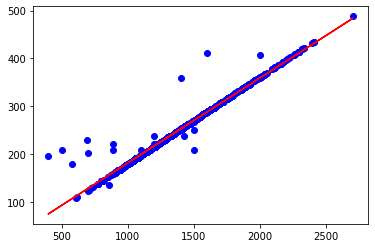

In [24]:
plt.scatter(train_x,train_y , color = 'blue')
plt.plot(train_x, regre.coef_[0]*train_x + regre.intercept_, '-r')
plt.show()

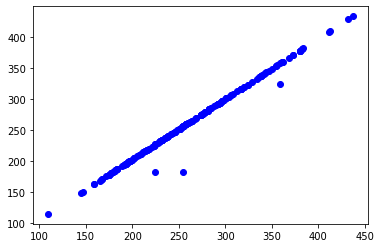

In [25]:
plt.scatter(test_y,predict_y , color = 'blue')
plt.show()

In [26]:
print(metrics.mean_squared_error(test_y,predict_y))

42.332063878576086


In [27]:
multi_regre = linear_model.LinearRegression()

In [28]:
X = emission[['TORQUE','FUELCONSUMPTION_COMB','ENGINESIZE']]
Y = emission['CO2EMISSIONS']
Train_x , Test_x , Train_y , Test_y = train_test_split(X,Y,test_size = 0.2, random_state=12)

In [29]:
multi_regre.fit(Train_x,Train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
multi_regre.score(Train_x, Train_y)

0.976821508315588

In [31]:
print("Coefficient or Slope of regression line is: " , multi_regre.coef_)
print("Intercept of regression line is: ",multi_regre.intercept_)


Coefficient or Slope of regression line is:  [0.15487009 1.77493913 2.10779125]
Intercept of regression line is:  8.768053694852654


In [32]:
predict_Y = multi_regre.predict(Test_x)

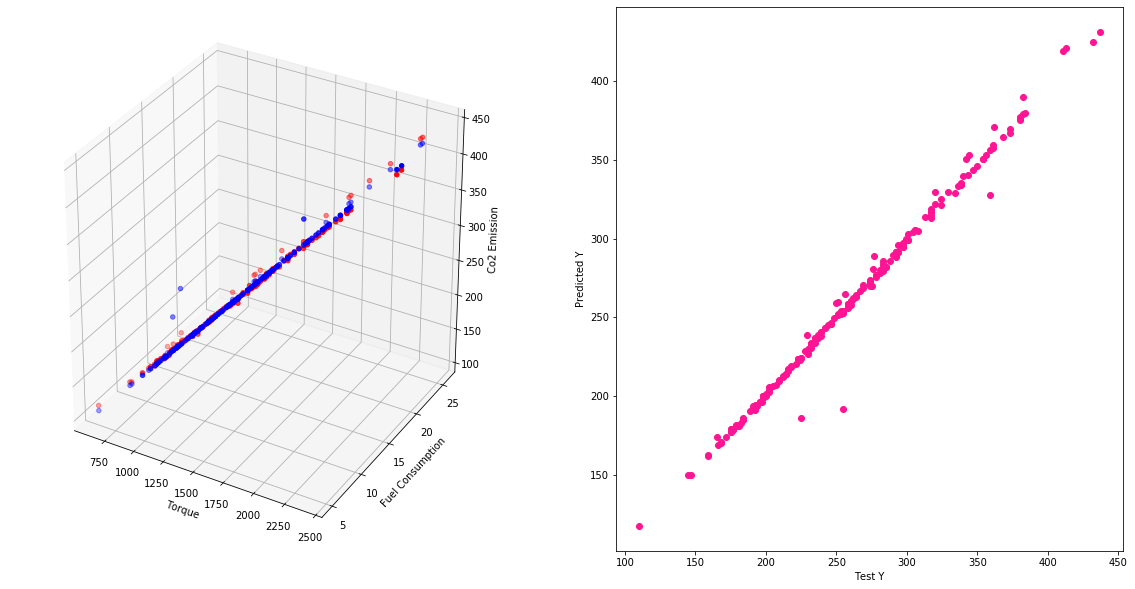

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

ax1.scatter(Test_x['TORQUE'], Test_x['FUELCONSUMPTION_COMB'], Test_y, c='b', marker='o')

ax1.scatter(Test_x['TORQUE'], Test_x['FUELCONSUMPTION_COMB'], predict_Y, c='r',  marker='o')

ax1.set_xlabel('Torque')
ax1.set_ylabel('Fuel Consumption')
ax1.set_zlabel('Co2 Emission')


ax2.scatter(Test_y,predict_Y , color = '#FF1493')
ax2.set_xlabel('Test Y')
ax2.set_ylabel('Predicted Y')
plt.show()

In [34]:
print(metrics.mean_squared_error(Test_y,predict_Y))

40.183038589818
